In [4]:
from __future__ import print_function
import matplotlib.pyplot as plt
import itertools
import mdtraj as md
import mdtraj.testing
import numpy as np
import pandas as pd
import wernet_nilsson as wn
import seaborn as sns

In [2]:
dict = wn.estimate_protection_factors('stateH_H.pdb', distance_threshold=6.5) 
dict_1 = wn.estimate_protection_factors('stateU_H_new.pdb', distance_threshold=6.5)
#convert dictionary to dataframe
state2_imp = pd.DataFrame(list(dict.items()), columns=['res_num', 'yg_pf_2'])
state1_imp = pd.DataFrame(list(dict_1.items()), columns=['res_num', 'yg_pf_1'])
#merge dataframes
merged_imp = pd.merge(state1_imp, state2_imp, on='res_num')
#calculate the difference in protection factors
merged_imp['yg_diff'] = merged_imp['yg_pf_2'] - merged_imp['yg_pf_1']
merged_imp

sequence = 'MAPLRKTAVLKLYVAGNTPNSVRALKTLNNILEKEFKGVYALKVIDVLKNPQLAEEDKILATPTLAKVLPPPVRRIIGDLSNREKVLIALRLLAEEIGD'

merged_imp['aa'] = [sequence[i-1] for i in merged_imp['res_num']]
#drop rows that are proline or glycine
merged_imp = merged_imp[merged_imp['aa'] != 'P']
merged_imp = merged_imp[merged_imp['aa'] != 'G']

In [40]:
wn.calculate_hbond_number('stateH+babel.pdb')

{9: 1,
 69: 1,
 10: 2,
 41: 2,
 11: 2,
 66: 2,
 12: 2,
 43: 2,
 13: 2,
 64: 2,
 14: 2,
 45: 2,
 16: 1,
 46: 1,
 22: 2,
 18: 2,
 23: 3,
 19: 1,
 24: 2,
 20: 1,
 25: 2,
 21: 2,
 26: 2,
 27: 2,
 28: 2,
 29: 2,
 30: 2,
 31: 2,
 32: 1,
 33: 1,
 34: 1,
 35: 2,
 8: 1,
 47: 1,
 55: 1,
 51: 1,
 56: 1,
 52: 1,
 57: 3,
 53: 1,
 58: 2,
 54: 1,
 59: 1,
 65: 2,
 76: 2,
 67: 1,
 74: 1,
 78: 1,
 63: 1,
 81: 2,
 79: 1,
 87: 2,
 83: 2,
 88: 1,
 84: 1,
 89: 1,
 85: 1,
 90: 2,
 86: 1,
 91: 2,
 93: 2,
 95: 1,
 97: 1,
 99: 1,
 98: 1,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 15: 0,
 17: 0,
 36: 0,
 37: 0,
 38: 0,
 39: 0,
 40: 0,
 42: 0,
 44: 0,
 48: 0,
 49: 0,
 50: 0,
 60: 0,
 61: 0,
 62: 0,
 68: 0,
 70: 0,
 71: 0,
 72: 0,
 73: 0,
 75: 0,
 77: 0,
 80: 0,
 82: 0,
 92: 0,
 94: 0,
 96: 0,
 100: 0,
 101: 0,
 102: 0,
 103: 0,
 104: 0,
 105: 0,
 106: 0,
 107: 0,
 108: 0,
 109: 0,
 110: 0,
 111: 0,
 112: 0,
 113: 0,
 114: 0,
 115: 0,
 116: 0,
 117: 0,
 118: 0,
 119: 0,
 120: 0,
 121: 0,
 122: 0,
 123: 0,
 

In [42]:
t = md.load_pdb('prep_stateU.pdb')
hbonds = md.baker_hubbard(t, periodic=False)
label = lambda hbond : '%s -- %s' % (t.topology.atom(hbond[0]), t.topology.atom(hbond[2]))
for hbond in hbonds:
    print(label(hbond))

ALA8-N -- VAL39-O
VAL9-N -- LEU69-O
LEU10-N -- ALA41-O
LYS11-N -- ALA66-O
LEU12-N -- LYS43-O
TYR13-N -- THR64-O
VAL14-N -- ILE45-O
GLY16-N -- ASP46-OD1
GLY16-N -- ASP46-OD2
THR18-N -- SER21-OG
SER21-N -- THR18-OG1
VAL22-N -- THR18-O
ARG23-N -- PRO19-O
ARG23-NH1 -- ASP79-OD2
ARG23-NH1 -- SER81-OG
ALA24-N -- ASN20-O
LEU25-N -- SER21-O
LYS26-N -- VAL22-O
THR27-N -- ARG23-O
LEU28-N -- ALA24-O
ASN29-N -- LEU25-O
ASN29-ND2 -- ASN29-N
ASN30-N -- LYS26-O
ILE31-N -- THR27-O
LEU32-N -- LEU28-O
GLU33-N -- ASN29-O
LYS34-N -- ASN30-O
GLU35-N -- ILE31-O
PHE36-N -- LEU32-O
LYS37-N -- LEU32-O
VAL39-N -- PHE36-O
ALA41-N -- ALA8-O
LYS43-N -- LEU10-O
ILE45-N -- LEU12-O
VAL47-N -- VAL14-O
LEU48-N -- ASP46-OD1
LYS49-N -- ASP46-O
ASP57-N -- ALA54-O
THR64-N -- TYR13-O
LEU65-N -- ILE76-O
ALA66-N -- LYS11-O
LYS67-N -- ARG74-O
LYS67-NZ -- GLU96-OE1
VAL68-N -- VAL9-O
LEU69-N -- VAL9-O
ARG74-N -- LYS67-O
ILE76-N -- LEU65-O
GLY78-N -- PRO63-O
SER81-N -- ASP79-OD1
ASN82-N -- ASN82-ND2
LYS85-N -- ASN82-OD1
VAL86-N -

hbonds

In [18]:
hbonds
# Function to extract residues from hydrogen bonds that takes in a trajectory and hydrogen bonds
def get_residues(t, hbond):
    res1 = t.topology.atom(hbond[0]).residue.index
    res2 = t.topology.atom(hbond[2]).residue.index
    return [res1, res2]

residue_counts = {}
for hbond in hbonds:
    residues = get_residues(t, hbond)
    for res in residues:
        if res not in residue_counts:
            residue_counts[res] = 0
        residue_counts[res] += 1
residue_counts
all_residues = set(range(t.topology.n_residues))
residues_with_hbonds = set(residue_counts.keys())
residues_without_hbonds = all_residues - residues_with_hbonds
for res in residues_without_hbonds:
    residue_counts[res] = 0
#add 1 to all of the keys 
residue_counts = {k+1: v for k, v in residue_counts.items()}
residue_counts


{1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 0,
 36: 0,
 37: 0,
 38: 0,
 39: 0,
 40: 0,
 41: 0,
 42: 0,
 43: 0,
 44: 0,
 45: 0,
 46: 0,
 47: 0,
 48: 0,
 49: 0,
 50: 0,
 51: 0,
 52: 0,
 53: 0,
 54: 0,
 55: 0,
 56: 0,
 57: 0,
 58: 0,
 59: 0,
 60: 0,
 61: 0,
 62: 0,
 63: 0,
 64: 0,
 65: 0,
 66: 0,
 67: 0,
 68: 0,
 69: 0,
 70: 0,
 71: 0,
 72: 0,
 73: 0,
 74: 0,
 75: 0,
 76: 0,
 77: 0,
 78: 0,
 79: 0,
 80: 0,
 81: 0,
 82: 0,
 83: 0,
 84: 0,
 85: 0,
 86: 0,
 87: 0,
 88: 0,
 89: 0,
 90: 0,
 91: 0,
 92: 0,
 93: 0,
 94: 0,
 95: 0,
 96: 0,
 97: 0,
 98: 0,
 99: 0}

/var/folders/n0/ny5865_5769bgkky50n4qpg40000gp/T/ipykernel_82787/1426436395.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  state1_forrest = pd.read_csv(state1_forrest, delim_whitespace=True)
/var/folders/n0/ny5865_5769bgkky50n4qpg40000gp/T/ipykernel_82787/1426436395.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  state2_forrest = pd.read_csv(state2_forrest, delim_whitespace=True)


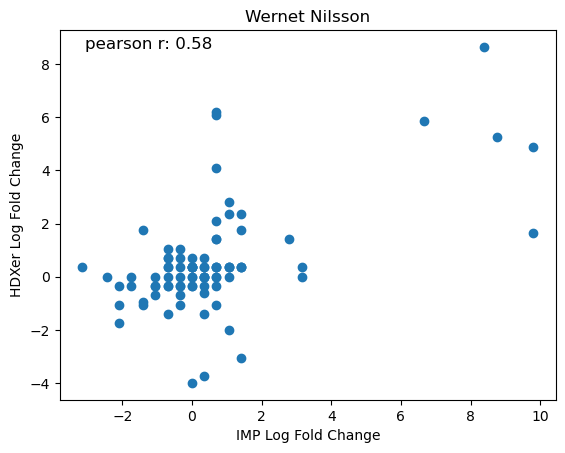

In [7]:
#read in hdxer data
state1_forrest = '/Users/yuliagutierrez/Desktop/F24/sali_lab/rotation_project/stateU_logPF.dat'
state2_forrest = '/Users/yuliagutierrez/Desktop/F24/sali_lab/rotation_project/stateH_logPF.dat'

state1_forrest = pd.read_csv(state1_forrest, delim_whitespace=True)
state2_forrest = pd.read_csv(state2_forrest, delim_whitespace=True)

state1_forrest.rename(columns={'#': 'res_num', 'ResID': 'hxder_log_pf_s1'}, inplace=True)
state1_forrest

#drop all columns except for the res_num and hxder_pf
state1_forrest = state1_forrest[['res_num', 'hxder_log_pf_s1']]

#add one to the res_num column to match the res_num column in the other dataframe
state1_forrest['res_num'] = state1_forrest['res_num'] + 1

#state2
state2_forrest.rename(columns={'#': 'res_num', 'ResID': 'hxder_log_pf_s2'}, inplace=True)
state2_forrest = state2_forrest[['res_num', 'hxder_log_pf_s2']]

#add one to the res_num column to match the res_num column in the other dataframe
state2_forrest['res_num'] = state2_forrest['res_num'] + 1
#merge the two dataframes
merged_forrest = pd.merge(state1_forrest, state2_forrest, on='res_num')
#calculate the difference in protection factors
merged_forrest['hdxer_diff'] = merged_forrest['hxder_log_pf_s2'] - merged_forrest['hxder_log_pf_s1']
merged_forrest

#merge the two dataframes
merged = pd.merge(merged_imp, merged_forrest, on='res_num')
merged

#plot the difference in protection factors
plt.scatter(merged['yg_diff'], merged['hdxer_diff'])
#calculate the corelation coefficient
merged['yg_diff'].corr(merged['hdxer_diff'])

#add x and y labels and the pearson correlation coefficient to the plot 
plt.xlabel('IMP Log Fold Change')
plt.ylabel('HDXer Log Fold Change')
#mvoe the text to the top left corner
plt.text(0.05, 0.95, f'pearson r: {merged["yg_diff"].corr(merged["hdxer_diff"]):.2f}', transform=plt.gca().transAxes, fontsize=12)
plt.title ("Wernet Nilsson")
plt.savefig('wn_logfoldchange.png', dpi = 600)

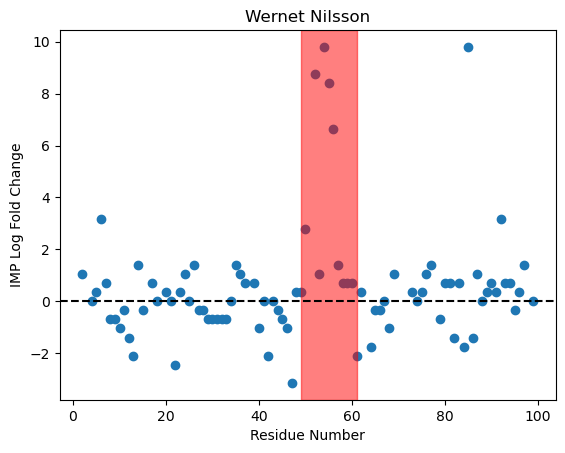

In [5]:
#make a scatterolot of res_num vs the difference in protection factors
plt.scatter(merged['res_num'], merged['yg_diff'])
#change the x and y labels
plt.xlabel('Residue Number')
plt.ylabel('IMP Log Fold Change')
plt.title ("Wernet Nilsson")

#add axvspan between x = 49 and x = 61
plt.axvspan(49, 61, color='red', alpha=0.5)
#add y = 0
plt.axhline(y=0, color='black', linestyle='--')
#save fig
plt.savefig('wn_resnum.png', dpi = 600)

0.8082880809567724

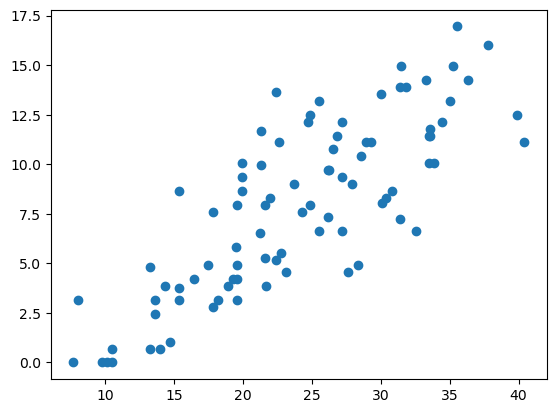

In [21]:
plt.scatter(merged['yg_pf_1'], merged['hxder_log_pf_s1'])
merged['yg_pf_1'].corr(merged['hxder_log_pf_s1'])

0.7032737657118152

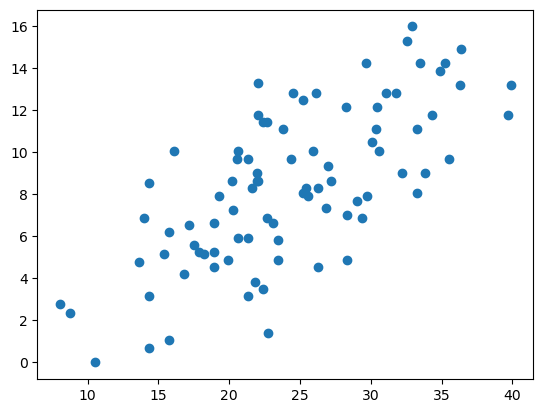

In [22]:
plt.scatter(merged['yg_pf_2'], merged['hxder_log_pf_s2'])
merged['yg_pf_2'].corr(merged['hxder_log_pf_s2'])

<Figure size 1000x500 with 0 Axes>

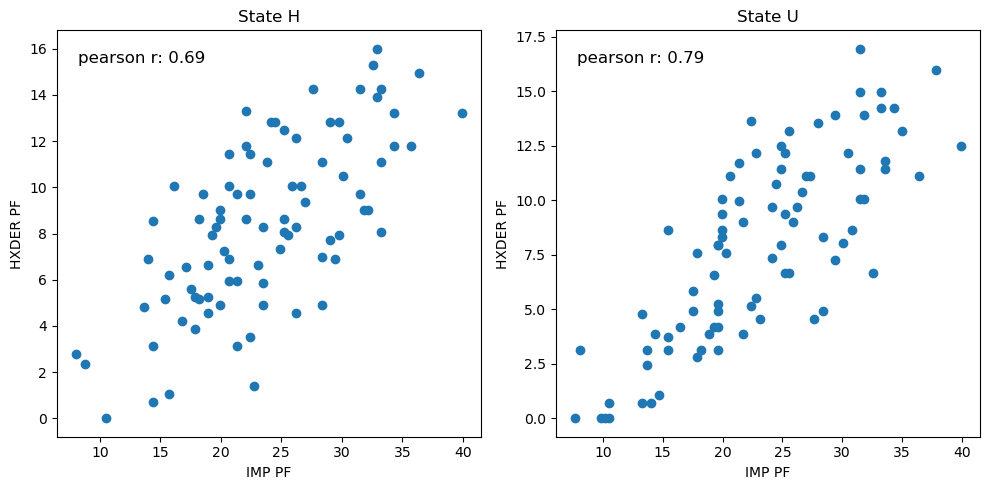

In [6]:

plt.figure(figsize=(10, 5))  # Adjust the figure size to be wider
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Create a figure with 1 row and 2 columns

# Plot for State H
axs[0].scatter(merged['yg_pf_2'], merged['hxder_log_pf_s2'])
axs[0].set_title('State H')
axs[0].set_xlabel('IMP PF')
axs[0].set_ylabel('HXDER PF')

# Plot for State U
axs[1].scatter(merged['yg_pf_1'], merged['hxder_log_pf_s1'])
axs[1].set_title('State U')
axs[1].set_xlabel('IMP PF')
axs[1].set_ylabel('HXDER PF')

axs[0].text(0.05, 0.95, f'pearson r: {merged["yg_pf_2"].corr(merged["hxder_log_pf_s2"]):.2f}', transform=axs[0].transAxes, fontsize=12, verticalalignment='top')
axs[1].text(0.05, 0.95, f'pearson r: {merged["yg_pf_1"].corr(merged["hxder_log_pf_s1"]):.2f}', transform=axs[1].transAxes, fontsize=12, verticalalignment='top')

# Adjust layout for better spacing
plt.tight_layout()

# save the plot
plt.savefig('scatter_plot_wn.png', dpi = 600)

# Show the plot
plt.show()

